In [3]:
from qiskit import transpile, QuantumCircuit
from qiskit_aer import Aer, AerSimulator, AerJob

import sys
sys.path.append('/workspaces/scribing/notebooks/quantum')
from quantum_helper_functions import *
import pandas as pd

## Specifying the marginal probability

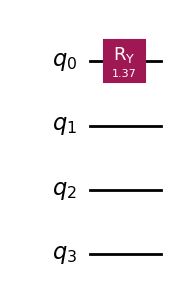

In [7]:
event_a = 0.4

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(event_a), 0)

qc.draw('mpl')

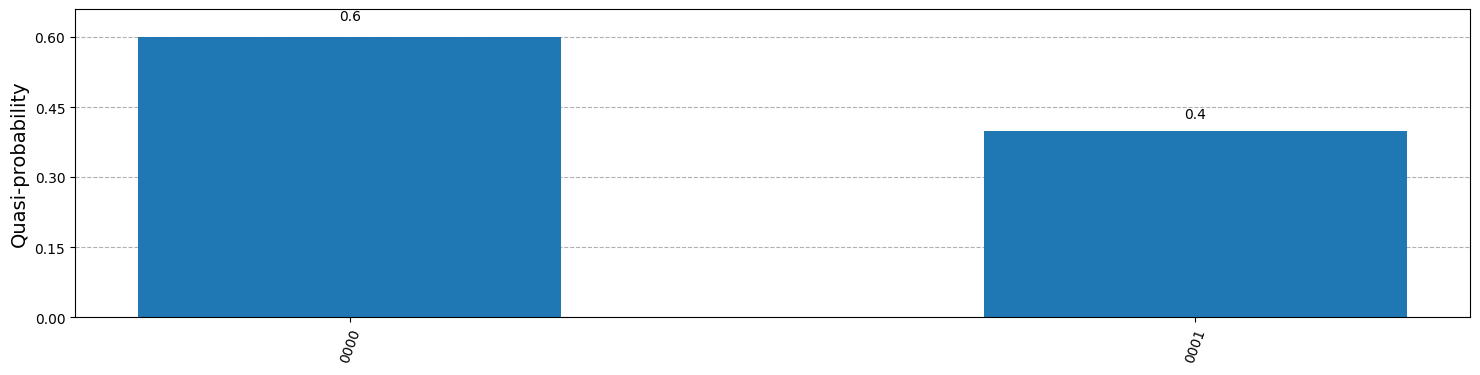

In [6]:
run_circuit(qc)

✨ Similar to the Hadamard gate, the $R_Y$-gate cuts the probability into two parts, but it provides us with a tool to control the size of the two parts.

## Each marginal probability uses a qubit

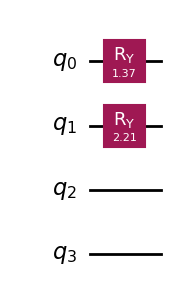

In [8]:
# Specify the marginal probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set qubit to event_a
qc.ry(prob_to_angle(event_a), 0)

# Set fresh qubit to event_b
qc.ry(prob_to_angle(event_b), 1)

qc.draw('mpl')

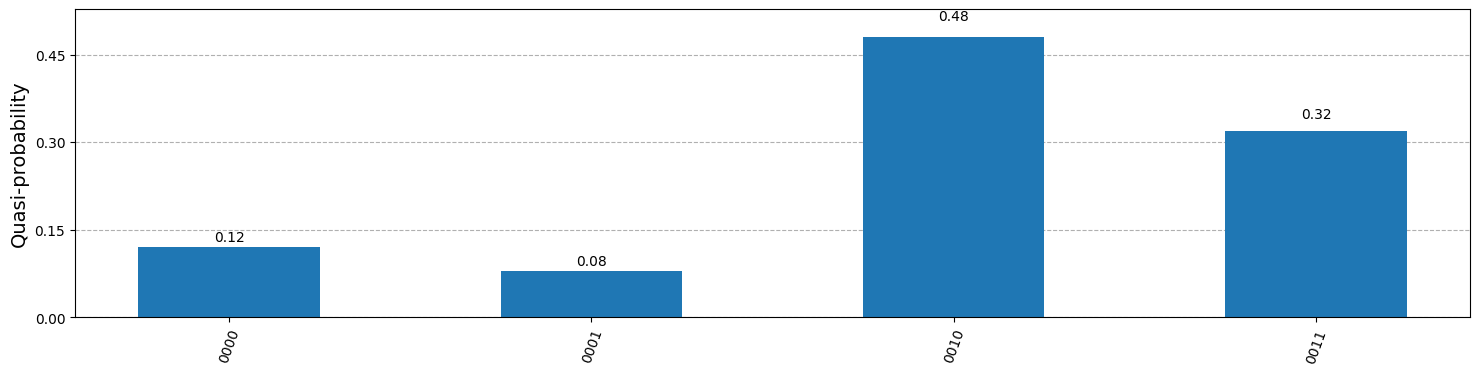

In [9]:
run_circuit(qc)

## The Controlled $R_Y$ Gate

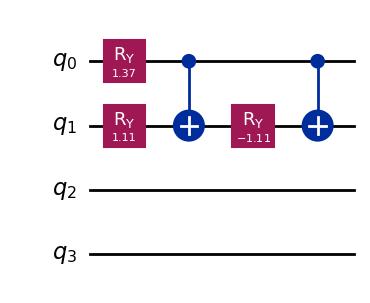

In [14]:
# Specify the marginal probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set qubit to prior
qc.ry(prob_to_angle(event_a), 0)

# Apply half of the modifier
qc.ry(prob_to_angle(event_b)/2, 1)

# Entangle qubits 0 and 1
qc.cx(0,1)

# Apply the other half of the modifier
qc.ry(-prob_to_angle(event_b)/2, 1)

# Unentangle qubits 0 and 1
qc.cx(0,1)

qc.draw('mpl')

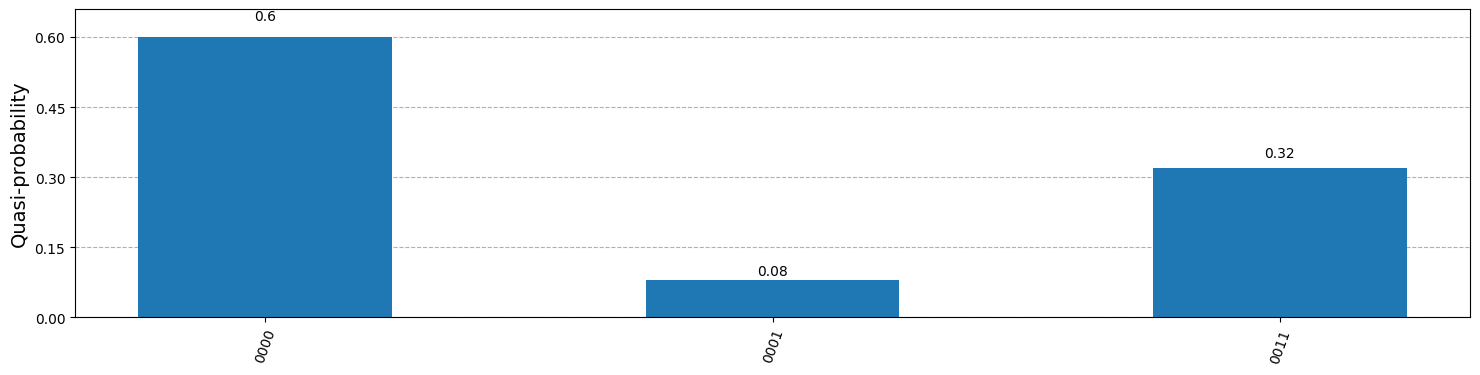

In [15]:
run_circuit(qc)

## Qiskit shortcut for creating a controlled $R_Y$ gate

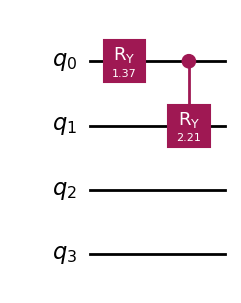

In [17]:
# Specify event probabilities
event_a = 0.4
event_b = 0.8

qc = QuantumCircuit(4)

# Set marginal probability
qc.ry(prob_to_angle(event_a), 0)

# Apply controlled RY-gate
qc.cry(prob_to_angle(event_b), 0, 1)

qc.draw('mpl')